# 1 - Introduction

Data Scientist Final Project - id/x Partners

Name : Gilang Wiradhyaksa

Data : [Loan Dataset](https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv)

# 2 - Import Libraries

In [337]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV #, RandomizedSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

# 3 - Data Loading

In [338]:
# Original Data
df_ori = pd.read_csv('loan_data_2007_2014.csv', index_col=0)

In [339]:
df = df_ori.copy()
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [341]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [342]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

# 4 - Data Preprocessing

## 4.1 - Check Duplicate Data

In [343]:
# Check duplicated data
df.duplicated().sum()

0

No duplicated row found in this dataset.

## 4.2 - Missing Value

In [344]:
df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 74, dtype: int64

There is many column with no data at all, we will remove this column.

In [345]:
df.shape

(466285, 74)

In [346]:
df = df.dropna(axis=1, how='all')
df.shape

(466285, 57)

All column with no value at all has been successfully removed, the number of column drop from 74 to 57.

In [347]:
# Count null values in each column
null_counts = df.isnull().sum()

# Filter columns with more than 0 null values
columns_with_null = null_counts[null_counts > 0]
columns_with_null

emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340304
title                              21
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
dtype: int64

Checking column with more many null values but not all is null. We will remove ROW on the column with very few null, since the data is big, removing 0.1% data is better for handling missing value.

In [348]:
# List column with few row is null
few_null = ['annual_inc', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 
            'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq']

# Remove Row with few column null
print('before remove row : ', df.shape)
df = df.dropna(subset=few_null)
print('after remove row : ', df.shape)


before remove row :  (466285, 57)
after remove row :  (466079, 57)


Row which having null is sucessfully removed, the number of row removed is about 200 row from 460k data. Next let's check on the many null column.

In [349]:
# Count null values in each column
null_counts = df.isnull().sum()

# Filter columns with more than 0 null values
columns_with_null = null_counts[null_counts > 0]
columns_with_null

emp_title                       27556
emp_length                      21003
desc                           340246
mths_since_last_delinq         250276
mths_since_last_record         403552
revol_util                        308
last_pymnt_d                      376
next_pymnt_d                   227123
mths_since_last_major_derog    367114
tot_coll_amt                    70116
tot_cur_bal                     70116
total_rev_hi_lim                70116
dtype: int64

We still have 12 column with many null values. We will check if this column is important for model creation or not.

In [350]:
# List not-important column with many null value
ni_null_col = ['emp_title', 'emp_length', 'desc', 'revol_util', 'mths_since_last_delinq', 'mths_since_last_record', 
               'last_pymnt_d', 'next_pymnt_d', 'mths_since_last_major_derog', 'tot_coll_amt', 'total_rev_hi_lim']

print('before remove column : ', df.shape)
df_selection = df.drop(columns=ni_null_col)
print('after remove column : ', df_selection.shape)

before remove column :  (466079, 57)
after remove column :  (466079, 46)


After checking all the 12 column, we decide to remove 11 unimportant column and this column have many missing value. The number of column is drop from 57 to 46. Now we have 1 column left that have missing value which is "tot_cur_bal". As I consider this is imporant feature so I will replace this NULL value with 0.

In [351]:
# Replace null in current balance with 0
df_selection['tot_cur_bal'] = df_selection['tot_cur_bal'].fillna(0)

"tot_cur_bal" column null values has been successfully replaced with 0 value.

In [352]:
# Count null values in each column
null_counts = df_selection.isnull().sum()

# Filter columns with more than 0 null values
columns_with_null = null_counts[null_counts > 0]
columns_with_null

Series([], dtype: int64)

No more missing Value found.

In [353]:
# DF Shape after missing value handling
df_selection.shape

(466079, 46)

Dataframe shape after missing value handling.

## 4.3 - Target Labeling

In [354]:
df_selection.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_cur_bal'],
      dtype='object')

It seems "loan_status" is the target in this dataset. Let's check the value on those column.

In [355]:
# Check target (y) unique value
df_selection['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Based on this value, I will simplify this target value to 0 and 1.  
Where **0** as **Negative** label and **1** as **Positive** label.  
 
Here I decide to set :  
`0 = Negative = Fail Payment / Bad Customer`  
`1 = Positive = Full Payment / Good Customer`

In [356]:
# Mapping target (y)
def loanStatus(row):
   if row['loan_status'] == 'Fully Paid' or row['loan_status'] == 'Current' or row['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid':
      return 1
   else:
      return 0
   
df_selection['loan_status'] = df_selection.apply(lambda row: loanStatus(row), axis=1)
print(df_selection['loan_status'].unique())

[1 0]


Column "loan_status" has been successfully replaced with 0 and 1 within the condition 'Fully Paid' and 'Current' is labeled as 1 and the rest is 0.

## 4.4 - Feature Selection

In [357]:
df_selection.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_cur_bal
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,0.00,0.00,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.00,117.08,1.11,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,0.00,0.00,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,16.97,0.00,0.00,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,0.00,0.00,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0


In [358]:
pd.reset_option('display.max_columns')

In [359]:
# Feature Selection
imp_col = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'home_ownership', 'annual_inc', 'verification_status', 
           'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv', 
           'last_pymnt_amnt', 'acc_now_delinq', 'tot_cur_bal', 'loan_status']

Select important column/feature based and we decide this 20 feature are the most important to create a model.

In [360]:
df_selection['home_ownership'].unique()
# Own, Mortgage = Own, else None

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [361]:
df_selection['verification_status'].unique()
# Source Verified = Verified

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [362]:
print('before feature selection : ', df_selection.shape)
df_selection = df_selection[imp_col]
print('after feature selection : ', df_selection.shape)

before feature selection :  (466079, 46)
after feature selection :  (466079, 20)


The number of column drop from 46 to 20 after we select the most imporant feature.

## 4.5 - Feature Creation

In [363]:
# Remove 'months' from term
df_selection['term'] = df_selection['term'].str.replace('months', '').str.strip()

In [364]:
# Replace Source verified to verified from verification status
df_selection['verification_status'] = df_selection['verification_status'].str.replace('Source Verified', 'Verified').str.strip()
df_selection['verification_status'].unique()

array(['Verified', 'Not Verified'], dtype=object)

Simplify column 'verification_status' into 'Verified and 'Not Verified'

In [365]:
# Mapping Home Ownership
def homeOwnership(row):
   if row['home_ownership'] == 'OWN' or row['home_ownership'] == 'MORTGAGE':
      return 'OWN'
   else:
      return 'NONE'
   
df_selection['home_ownership'] = df_selection.apply(lambda row: homeOwnership(row), axis=1)
print(df_selection['home_ownership'].unique())

['NONE' 'OWN']


Simplify column 'home_ownership' into 'Own' and 'None'

In [366]:
df_selection.head()

,loan_amnt,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,open_acc,pub_rec,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,last_pymnt_amnt,acc_now_delinq,tot_cur_bal,loan_status
0,5000,5000,36,10.65,B,NONE,24000.0,Verified,27.65,0.0,3.0,0.0,9.0,f,5861.071414,5831.78,171.62,0.0,0.0,1
1,2500,2500,60,15.27,C,NONE,30000.0,Verified,1.00,0.0,3.0,0.0,4.0,f,1008.710000,1008.71,119.66,0.0,0.0,0
2,2400,2400,36,15.96,C,NONE,12252.0,Not Verified,8.72,0.0,2.0,0.0,10.0,f,3003.653644,3003.65,649.91,0.0,0.0,1
3,10000,10000,36,13.49,C,NONE,49200.0,Verified,20.00,0.0,10.0,0.0,37.0,f,12226.302210,12226.30,357.48,0.0,0.0,1
4,3000,3000,60,12.69,B,NONE,80000.0,Verified,17.94,0.0,15.0,0.0,38.0,f,3242.170000,3242.17,67.79,0.0,0.0,1


In [367]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466079 entries, 0 to 466284
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466079 non-null  int64  
 1   funded_amnt          466079 non-null  int64  
 2   term                 466079 non-null  object 
 3   int_rate             466079 non-null  float64
 4   grade                466079 non-null  object 
 5   home_ownership       466079 non-null  object 
 6   annual_inc           466079 non-null  float64
 7   verification_status  466079 non-null  object 
 8   dti                  466079 non-null  float64
 9   delinq_2yrs          466079 non-null  float64
 10  open_acc             466079 non-null  float64
 11  pub_rec              466079 non-null  float64
 12  total_acc            466079 non-null  float64
 13  initial_list_status  466079 non-null  object 
 14  total_pymnt          466079 non-null  float64
 15  total_pymnt_inv      4

Above are the preview of the Loan Dataset after we perform Data Preprocessing.

# 5 - Exploratory Data Analysis (EDA)

## 5.1 - Numerical Column

In [368]:
def exploreNumCol(df,  col):
    mean = df[col].mean()
    median = df[col].median()
    modus = df[col].mode().values[0]

    min = df[col].min()
    max = df[col].max()

    print(f'Mean {col} = {mean:.2f}')
    print(f'Median {col} = {median}')
    print(f'Modus {col} = {modus}')
    print(f'Min {col} = {min}')
    print(f'Max {col} = {max}')

    skew = df[col].skew()
    if skew < 0.5:
        print(f'Skewness {col} = {skew}, data distribution is normal')
    else:
        print(f'Skewness {col} = {skew}, data distribution is not normal')

In [369]:
exploreNumCol(df_selection, 'loan_amnt')

Mean loan_amnt = 14320.03
Median loan_amnt = 12000.0
Modus loan_amnt = 10000
Min loan_amnt = 500
Max loan_amnt = 35000
Skewness loan_amnt = 0.73091347969855, data distribution is not normal


[Text(0.5, 1.0, 'Loan Amount')]

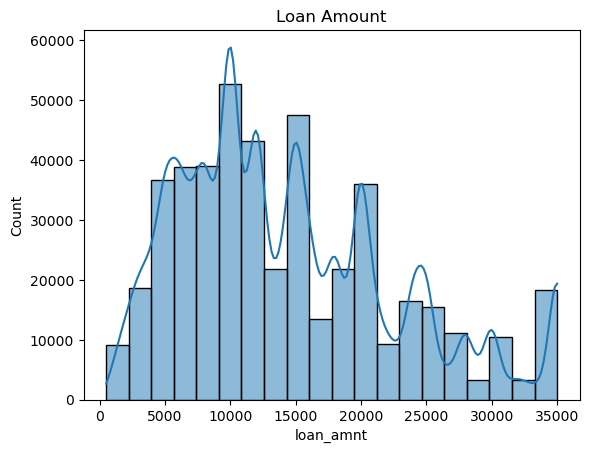

In [370]:
sns.histplot(df_selection['loan_amnt'], bins=20, kde=True).set(title='Loan Amount')

Column 'loan_amnt' distribution is not normal.

In [371]:
exploreNumCol(df_selection, 'annual_inc')

Mean annual_inc = 73277.46
Median annual_inc = 63000.0
Modus annual_inc = 60000.0
Min annual_inc = 1896.0
Max annual_inc = 7500000.0
Skewness annual_inc = 29.58542344175117, data distribution is not normal


In [372]:
def sns_barplot(df, groupby_column, label):
    plt.figure(figsize=(3, 5))
    df_barplot = df.groupby(groupby_column).size().reset_index(name='counts')
    ax = sns.barplot(data=df_barplot, x=groupby_column, y='counts', orient='v')
    ax.bar_label(ax.containers[0]) if label == True else None
    ax.set(title=f'Count of {groupby_column}')
    plt.show()

[Text(0.5, 1.0, 'Annual Income')]

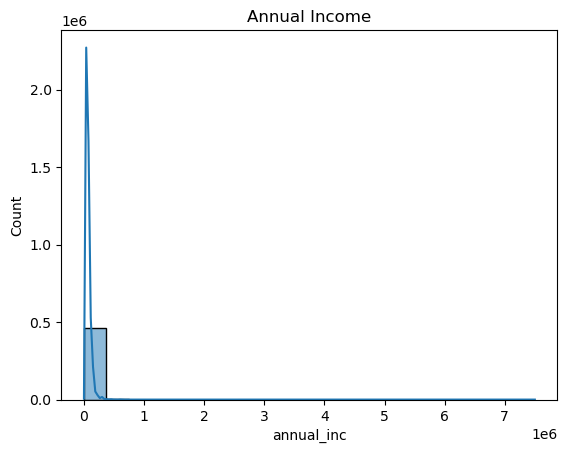

In [373]:
sns.histplot(df_selection['annual_inc'], bins=20, kde=True).set(title='Annual Income')

Column 'annual_inc' distribution is not normal.

## 5.2 - Target (y)

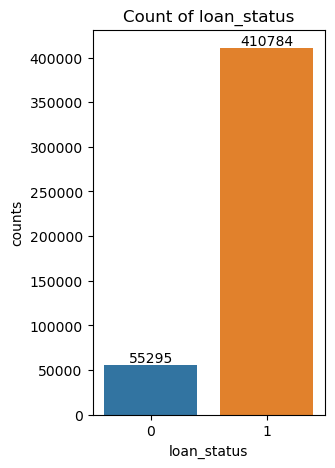

In [374]:
sns_barplot(df_selection, 'loan_status', True)

Based on the bargraph above, as we can see this dataset is imbalance. And this is normal because most of the customer is a good customer '1' and only few customer is categorize as fail payment/bad customer '0'.

# 6 - Feature Engineering

## 6.1 - Split Feature(X) and Target(y)

In [375]:
# Split X and y
X = df_selection.drop('loan_status', axis=1)
y = df_selection['loan_status']

## 6.2 - Split Train set and Test set

In [376]:
#Split train and test (80% Train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=21)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
print('y Train Size : ', y_train.shape)
print('y Test Size : ', y_test.shape)

Train Size :  (372863, 19)
Test Size :  (93216, 19)
y Train Size :  (372863,)
y Test Size :  (93216,)


In [287]:
X_train.head()

,loan_amnt,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,open_acc,pub_rec,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,last_pymnt_amnt,acc_now_delinq,tot_cur_bal
298150,14300,14300,36,14.49,C,OWN,60000.0,Verified,9.32,0.0,6.0,1.0,13.0,f,16238.02,16238.02,10332.10,0.0,264221.0
419894,5000,5000,36,22.45,E,NONE,48000.0,Verified,22.95,0.0,8.0,0.0,17.0,f,6314.32,6314.32,3240.40,0.0,37229.0
101446,9925,9925,36,21.60,E,OWN,28420.0,Verified,20.44,0.0,8.0,0.0,16.0,f,8665.82,8665.82,376.99,0.0,53899.0
369150,10150,10150,60,18.24,D,NONE,30000.0,Verified,27.30,0.0,7.0,0.0,13.0,w,4922.52,4922.52,259.08,0.0,29821.0
364736,8000,8000,36,11.67,B,NONE,57200.0,Not Verified,17.67,1.0,17.0,0.0,37.0,f,5024.74,5024.74,264.46,0.0,49505.0


## 6.3 - Handling Outlier

In [288]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df, bins=30) if variable is None else sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df) if variable is None else sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [289]:
def getDescribe(df, col):
    min_value = df[col].min()
    max_value = df[col].max()
    average_value = df[col].mean()
    mode_value = df[col].mode().iloc[0]

    # Print the results
    print("Minimum:", min_value)
    print("Maximum:", max_value)
    print("Average:", average_value)
    print("Mode:", mode_value)

In [290]:
getDescribe(X_train, 'annual_inc')

Minimum: 1896.0
Maximum: 7500000.0
Average: 73239.63143004266
Mode: 60000.0


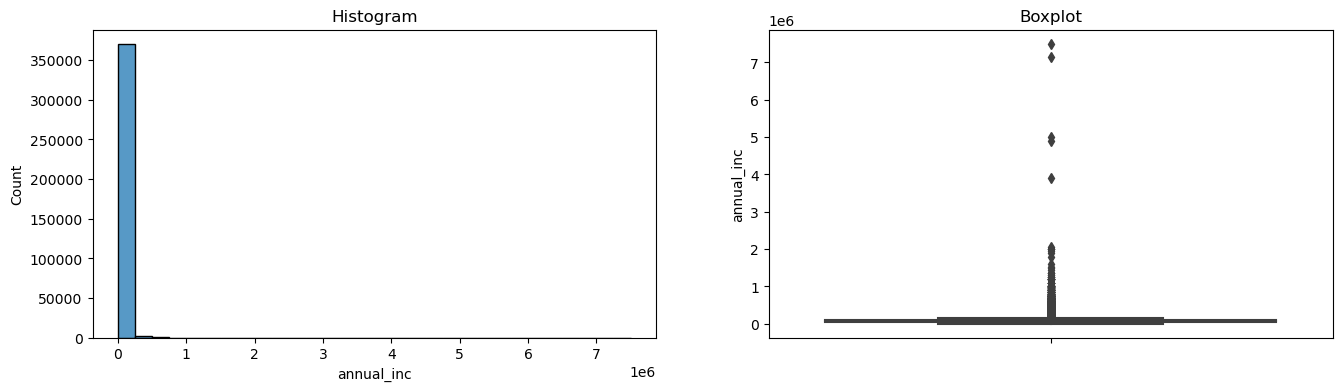

In [291]:
diagnostic_plots(X_train, 'annual_inc')

In [292]:
getDescribe(X_train, 'tot_cur_bal')

Minimum: 0.0
Maximum: 8000078.0
Average: 117962.7888286046
Mode: 0.0


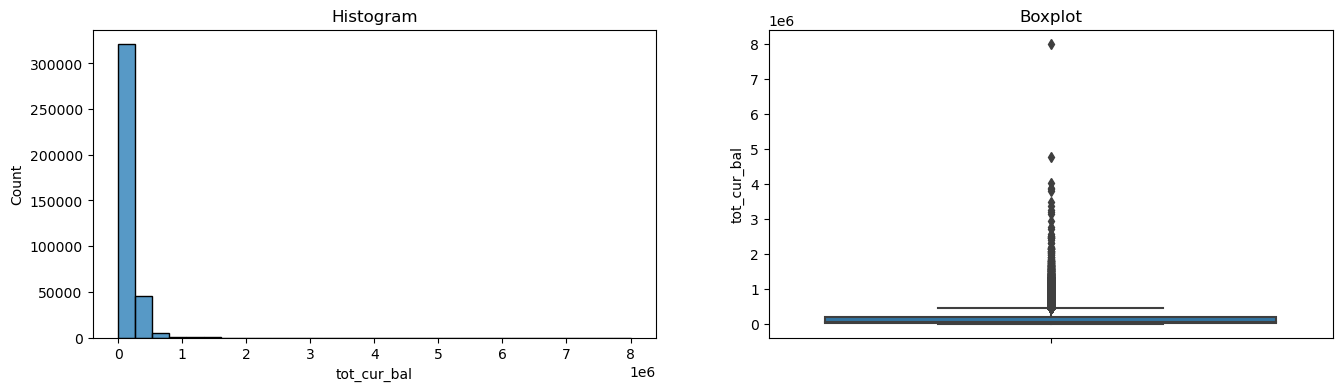

In [293]:
diagnostic_plots(X_train, 'tot_cur_bal')

We decide to use Tukey's Rule technique to handle the outliers because the data distribution for both column is not normal (Skewed distribution).

In [294]:
def getTukeysRuleBoundary(df, col, iqr_wide):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (IQR * iqr_wide)
    upper_boundary = df[col].quantile(0.75) + (IQR * iqr_wide)

    print(f'Lower Boundary {col} : {lower_boundary}')
    print(f'Upper Boundary {col} : {upper_boundary}')

    return lower_boundary, upper_boundary

def getPrecentageOutliers(df, col, upper_b):
    print('Total Data : {}'.format(len(df)))
    print('Data which ' + col + ' more than ' + str(upper_b) + ' : {}'.format(len(df[df[col] > upper_b])))
    print('% Data which ' + col + ' more than ' + str(upper_b) + ' : {}'.format(len(df[df[col] > upper_b])/len(df) * 100))

In [295]:
lower_b_annual_inc, upper_b_annual_inc = getTukeysRuleBoundary(X_train, 'annual_inc', 1.5)
lower_b_tot_cur_bal, upper_b_tot_cur_bal = getTukeysRuleBoundary(X_train, 'tot_cur_bal', 1.5)

Lower Boundary annual_inc : -20964.0
Upper Boundary annual_inc : 154940.0
Lower Boundary tot_cur_bal : -239085.75
Upper Boundary tot_cur_bal : 439708.25


In [296]:
getPrecentageOutliers(X_train, 'annual_inc', upper_b_annual_inc)
print('-----------------------------------------------------------------')
getPrecentageOutliers(X_train, 'tot_cur_bal', upper_b_tot_cur_bal)

Total Data : 372863
Data which annual_inc more than 154940.0 : 15877
% Data which annual_inc more than 154940.0 : 4.2581323435149105
-----------------------------------------------------------------
Total Data : 372863
Data which tot_cur_bal more than 439708.25 : 13457
% Data which tot_cur_bal more than 439708.25 : 3.6091003934420955


Total outliers for column annual_inc and tot_cur_bal is 3~4% of the total data, so it's safe to perform outliers handling.

In [297]:
# Flag the outliers in column `annual_inc`
outliers_annual_inc = np.where(X_train['annual_inc'] > upper_b_annual_inc, True, np.where(X_train['annual_inc'] < lower_b_annual_inc, True, False))

# Flag the outliers in column `tot_cur_bal`
outliers_tot_cur_bal = np.where(X_train['tot_cur_bal'] > upper_b_tot_cur_bal, True, np.where(X_train['tot_cur_bal'] < lower_b_tot_cur_bal, True, False))

# Trimming the dataset
X_train_trimmed = X_train.loc[~(outliers_annual_inc) + (outliers_tot_cur_bal)]
y_train_trimmed = y_train.loc[~(outliers_annual_inc) + (outliers_tot_cur_bal)]

print('Size X_train - Before trimming : ', X_train.shape)
print('Size X_train - After trimming  : ', X_train_trimmed.shape)
print('')
print('Size y_train - Before trimming : ', y_train.shape)
print('Size y_train - After trimming  : ', y_train_trimmed.shape)

Size X_train - Before trimming :  (372863, 19)
Size X_train - After trimming  :  (362104, 19)

Size y_train - Before trimming :  (372863,)
Size y_train - After trimming  :  (362104,)


In [298]:
# Split Numercal and Categorical
X_train_trimmed.head()

,loan_amnt,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,open_acc,pub_rec,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,last_pymnt_amnt,acc_now_delinq,tot_cur_bal
298150,14300,14300,36,14.49,C,OWN,60000.0,Verified,9.32,0.0,6.0,1.0,13.0,f,16238.02,16238.02,10332.10,0.0,264221.0
419894,5000,5000,36,22.45,E,NONE,48000.0,Verified,22.95,0.0,8.0,0.0,17.0,f,6314.32,6314.32,3240.40,0.0,37229.0
101446,9925,9925,36,21.60,E,OWN,28420.0,Verified,20.44,0.0,8.0,0.0,16.0,f,8665.82,8665.82,376.99,0.0,53899.0
369150,10150,10150,60,18.24,D,NONE,30000.0,Verified,27.30,0.0,7.0,0.0,13.0,w,4922.52,4922.52,259.08,0.0,29821.0
364736,8000,8000,36,11.67,B,NONE,57200.0,Not Verified,17.67,1.0,17.0,0.0,37.0,f,5024.74,5024.74,264.46,0.0,49505.0


Outliers in column `annual_inc` and `tot_cur_bal` has been successfully handled.

## 6.4 - Split Numerical and Categorical Column

In [304]:
# num_col_normal = []
num_col_skew = ['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 
                'total_acc', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt', 'acc_now_delinq', 'tot_cur_bal']
cat_col_ordinal = ['grade']
cat_col_nominal = ['term', 'home_ownership', 'verification_status', 'initial_list_status']

In [305]:
X_train_num_s = X_train_trimmed[num_col_skew]
X_train_cat_o = X_train_trimmed[cat_col_ordinal]
X_train_cat_n = X_train_trimmed[cat_col_nominal]

X_test_num_s = X_test[num_col_skew]
X_test_cat_o = X_test[cat_col_ordinal]
X_test_cat_n = X_test[cat_col_nominal]

## 6.5 - Feature Scaling

### 6.5.1 - Scaling Skew Data

In [306]:
#Scaling Numerical Column with Skew Data
scaler_mm = MinMaxScaler()
scaler_mm.fit(X_train_num_s)

MinMaxScaler()

In [307]:
X_train_num_s_scaled = scaler_mm.transform(X_train_num_s)
X_test_num_s_scaled = scaler_mm.transform(X_test_num_s)

In [310]:
X_train_num_s_scaled

array([[0.4       , 0.4       , 0.43943798, ..., 0.28565275, 0.        ,
        0.0330273 ],
       [0.13043478, 0.13043478, 0.8250969 , ..., 0.08958771, 0.        ,
        0.00465358],
       [0.27318841, 0.27318841, 0.78391473, ..., 0.01042269, 0.        ,
        0.00673731],
       ...,
       [0.24275362, 0.24275362, 0.43168605, ..., 0.20817088, 0.        ,
        0.00940503],
       [0.91014493, 0.91014493, 0.36676357, ..., 0.02006241, 0.        ,
        0.03021133],
       [0.75362319, 0.75362319, 0.71608527, ..., 0.0194926 , 0.        ,
        0.0056342 ]])

## 6.6 - Feature Encoding

### 6.6.1 - Ordinal Encoding

In [312]:
print(X_train['grade'].unique())

['C' 'E' 'D' 'B' 'F' 'A' 'G']


In [313]:
gradeOrder = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [314]:
od_encoder = OrdinalEncoder(categories=[gradeOrder])
od_encoder.fit(X_train_cat_o)

OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']])

In [315]:
X_train_cat_o_encoded = od_encoder.transform(X_train_cat_o)
X_test_cat_o_encoded = od_encoder.transform(X_test_cat_o)

In [316]:
X_train_cat_o_encoded

array([[2.],
       [4.],
       [4.],
       ...,
       [2.],
       [2.],
       [3.]])

### 6.6.2 - Nominal Encoding

In [317]:
oh_encoder = OneHotEncoder(handle_unknown='ignore')
oh_encoder.fit(X_train_cat_n)

OneHotEncoder(handle_unknown='ignore')

In [318]:
X_train_cat_n_encoded = oh_encoder.transform(X_train_cat_n).toarray()
X_test_cat_n_encoded = oh_encoder.transform(X_test_cat_n).toarray()

In [319]:
X_train_cat_n_encoded

array([[1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.]])

## 6.7 - Merge Data

In [321]:
X_train_final = np.concatenate([X_train_num_s_scaled, X_train_cat_o_encoded, X_train_cat_n_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_s_scaled, X_test_cat_o_encoded, X_test_cat_n_encoded], axis=1)

# 7 - Model Definition

## 7.1 - Logistic Regression

In [322]:
model_logreg = LogisticRegression()

## 7.2 - KNN

In [323]:
model_knn = KNeighborsClassifier(n_neighbors=3)

## 7.3 - Random Forest

In [326]:
model_rf = RandomForestClassifier()

# 8 - Model Training

## 8.1 - Logistic Regression Training

In [327]:
model_logreg.fit(X_train_final, y_train_trimmed)

LogisticRegression()

## 8.2 - KNN Training

In [328]:
model_knn.fit(X_train_final, y_train_trimmed)

KNeighborsClassifier(n_neighbors=3)

## 8.3 - Random Forest Training

In [329]:
model_rf.fit(X_train_final, y_train_trimmed)

RandomForestClassifier()

# 9 - Model Evaluation

## 9.1 - Logistic Regression

In [330]:
# Predict Train and test set
y_pred_train_lg = model_logreg.predict(X_train_final)
y_pred_test_lg = model_logreg.predict(X_test_final)

print(classification_report(y_train_trimmed, y_pred_train_lg))
print(classification_report(y_test, y_pred_test_lg))
print('Precision Score Train - LogReg : ', precision_score(y_train_trimmed, y_pred_train_lg))
print('Precision Score Test - LogReg : ', precision_score(y_test, y_pred_test_lg))

              precision    recall  f1-score   support

           0       0.78      0.22      0.35     43274
           1       0.90      0.99      0.95    318830

    accuracy                           0.90    362104
   macro avg       0.84      0.61      0.65    362104
weighted avg       0.89      0.90      0.87    362104

              precision    recall  f1-score   support

           0       0.77      0.23      0.35     11020
           1       0.91      0.99      0.95     82196

    accuracy                           0.90     93216
   macro avg       0.84      0.61      0.65     93216
weighted avg       0.89      0.90      0.88     93216

Precision Score Train - LogReg :  0.9039332286455518
Precision Score Test - LogReg :  0.9053013039273446


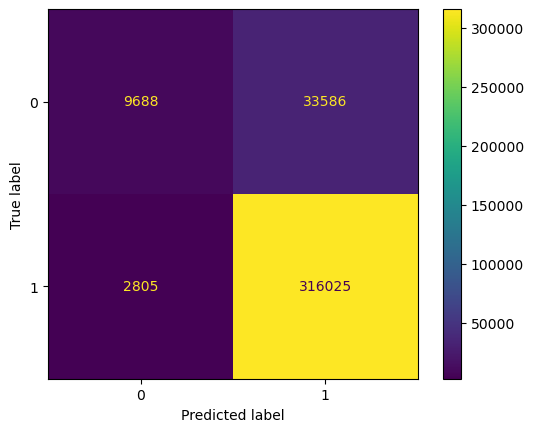

In [331]:
cm_train = confusion_matrix(y_train_trimmed, y_pred_train_lg)
ConfusionMatrixDisplay(cm_train).plot()

Using Logistic Regression with default parameter we got Precision Score 0.9 for train set and 0.9 for test set. This is a good result considering we are using default parameter. Let's check using Cross Validation if this model is good or just coincidence.

In [377]:
precision_train_cross_val = cross_val_score(model_logreg, X_train_final, y_train_trimmed, cv=5, scoring="precision")
print('Precision Train - All - Cross Validation  : ', precision_train_cross_val)
print('Precision Train - Mean - Cross Validation : ', precision_train_cross_val.mean())

Precision Train - All - Cross Validation  :  [0.90349085 0.90339926 0.90416327 0.90438663 0.90411351]
Precision Train - Mean - Cross Validation :  0.9039107037150987


Check result using cross validation mean give almost the same value as train-set prediction rate. About 0.9, so it's not coincidence the model is good.

## 9.2 - KNN

In [332]:
# Predict Train and test set
y_pred_train_knn = model_knn.predict(X_train_final)
y_pred_test_knn = model_knn.predict(X_test_final)

print(classification_report(y_train_trimmed, y_pred_train_knn))
print(classification_report(y_test, y_pred_test_knn))
print('Precision - KNN : ', precision_score(y_train_trimmed, y_pred_train_knn))
print('Precision - KNN : ', precision_score(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.85      0.52      0.65     43274
           1       0.94      0.99      0.96    318830

    accuracy                           0.93    362104
   macro avg       0.90      0.76      0.81    362104
weighted avg       0.93      0.93      0.92    362104

              precision    recall  f1-score   support

           0       0.58      0.31      0.40     11020
           1       0.91      0.97      0.94     82196

    accuracy                           0.89     93216
   macro avg       0.74      0.64      0.67     93216
weighted avg       0.87      0.89      0.88     93216

Precision - KNN :  0.9384779505761546
Precision - KNN :  0.9126432570440677


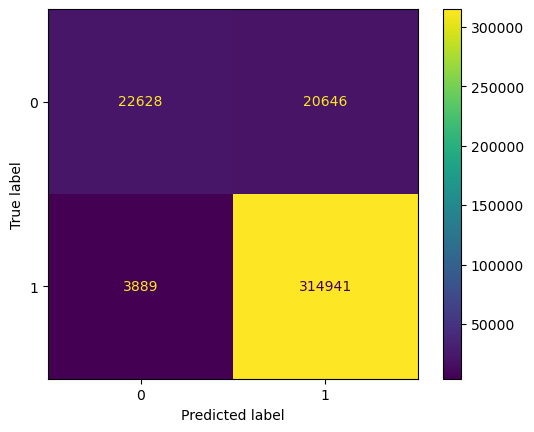

In [333]:
cm_train = confusion_matrix(y_train_trimmed, y_pred_train_knn)
ConfusionMatrixDisplay(cm_train).plot()

Using KNN algorithm with default parameter we got Precision Score 0.93 for train set and 0.91 for test set. This is even a better result than previous model Logistic Regression. Let's check using Cross Validation if this model is good or just coincidence.

In [378]:
precision_train_cross_val = cross_val_score(model_knn, X_train_final, y_train_trimmed, cv=5, scoring="precision")
print('Precision Train - All - Cross Validation  : ', precision_train_cross_val)
print('Precision Train - Mean - Cross Validation : ', precision_train_cross_val.mean())

Precision Train - All - Cross Validation  :  [0.9104671  0.91060267 0.91139577 0.9104537  0.91136591]
Precision Train - Mean - Cross Validation :  0.9108570301587464


Check result using cross validation mean give almost the same value as test-set prediction rate. About 0.91, so it's not coincidence the model is good.

## 9.3 - Random Forest

In [334]:
y_pred_train_rf = model_rf.predict(X_train_final)
y_pred_test_rf = model_rf.predict(X_test_final)

print(classification_report(y_train_trimmed, y_pred_train_rf))
print(classification_report(y_test, y_pred_test_rf))
print('Precision - RF : ', precision_score(y_train_trimmed, y_pred_train_rf))
print('Precision - RF : ', precision_score(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43274
           1       1.00      1.00      1.00    318830

    accuracy                           1.00    362104
   macro avg       1.00      1.00      1.00    362104
weighted avg       1.00      1.00      1.00    362104

              precision    recall  f1-score   support

           0       0.95      0.53      0.68     11020
           1       0.94      1.00      0.97     82196

    accuracy                           0.94     93216
   macro avg       0.95      0.77      0.83     93216
weighted avg       0.94      0.94      0.93     93216

Precision - RF :  0.999978045208053
Precision - RF :  0.9409723817839254


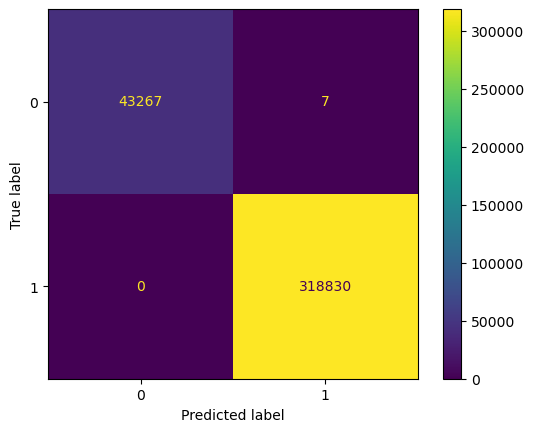

In [335]:
cm_train = confusion_matrix(y_train_trimmed, y_pred_train_rf)
ConfusionMatrixDisplay(cm_train).plot()

Using Random Forest algorithm with default parameter we got Precision Score 0.99 for train set and 0.94 for test set. This is the best result of all models. With almost 100% precision score on train-set and 94% on test-set this model considered as `Good Fit`. Let's check using Cross Validation if this model is really good or just coincidence.

In [379]:
precision_train_cross_val = cross_val_score(model_rf, X_train_final, y_train_trimmed, cv=5, scoring="precision")
print('Precision Train - All - Cross Validation  : ', precision_train_cross_val)
print('Precision Train - Mean - Cross Validation : ', precision_train_cross_val.mean())

Precision Train - All - Cross Validation  :  [0.93904528 0.9396121  0.93972271 0.93973251 0.93952346]
Precision Train - Mean - Cross Validation :  0.9395272118322506


Check result using cross validation mean give almost the same value as train-set prediction rate. About 0.93, so it's not coincidence the model is very good.

# 10 - Model Analysis

- To analyze this model, we use `Precision` metrics because we want to `minimalize False Positive`. In this case `False Positive` is customer whose actually Bad or Negative but predicted as Good Customer or Positive.
 
- Why is it better to minimalize False Positive, because for this Loan Case, it is `better if the Bank reject good customer` rather than `provide loan to a bad customer who have no intention or unable to pay`.
 
- From all the three model we tried as baseline, `Random Forest` model give us the best result compared to `Logistic Regression` and `KNN` with precision score 0.99 on train-set and 0.94 on test-set.
 
- After performing Cross Validation check on `Random Forest` model we still get very good result for the model which mean it's `not a coincidence` this model have a very good result.

# 11 - Conclusion

- Based on the EDA we know that this dataset is having imbalance data. This imbalance data sometimes can affect model result. For a better result this needs to be handled. Technique like SMOTE can be used to handle imbalance dataset.
 
- Based on the model evaluation, out of 3 model we tried, the best model is `Random Forest`. This model give 99% Precision score which mean it can correctly predict 99 out of 100 data.

- This `Random Forest` weakness is even with 99% precision score on train-set, when we check using cross validation and get the average result from it, we only get about 93% to 94% of precision score. So this is probably the real result. But it's still very good result.

- For next improvement, we can try to oversampling the data using SMOTE technique so the data is more balanced and has a possibility to improve the result.

- For more improvement, we can also try to do hyperparameter tuning for our best model `Random Forest`. Considering this result is a result of default parameter, so with hyperparameter tuning we might be able to improve it even better.